In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d salader/dogsvscats

In [2]:
# Set up paths
LOCAL_DATASET_DIR = '/content/dataset'  # Local copy for faster access

import os
import kagglehub

# Check if dataset exists locally
if not os.path.exists(LOCAL_DATASET_DIR):
    print("Dataset not found locally. Downloading...")

    # Download to temporary location
    tmp_path = kagglehub.dataset_download("https://www.kaggle.com/datasets/salader/dogsvscats")

    # Create the local dataset directory if it doesn't exist
    os.makedirs(LOCAL_DATASET_DIR, exist_ok=True)

    # Copy contents from the temporary download path to the local dataset directory
    os.system(f"cp -r {tmp_path}/* {LOCAL_DATASET_DIR}")
    print(f"Dataset downloaded and saved to local Colab storage at: {LOCAL_DATASET_DIR}")
else:
    print(f"Local copy of dataset already exists at: {LOCAL_DATASET_DIR}")

# Use LOCAL_DATASET_DIR for your training/processing
print(f"Working with dataset at: {LOCAL_DATASET_DIR}")

Local copy of dataset already exists at: /content/dataset
Working with dataset at: /content/dataset


In [8]:
import os
import cv2
import numpy as np

def load_images(folder_path, label, limit=25000):
  images=[]
  labels=[]
  # Define a consistent size for all images
  IMG_SIZE = (100, 100) # Example: resize all images to 100x100 pixels

  for idx, filename in enumerate(os.listdir(folder_path)):
    if idx == limit:
      break
    img_path=os.path.join(folder_path, filename)
    # Ensure we are only trying to read files
    if os.path.isfile(img_path):
      img=cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      if img is not None:
        # Resize the image to a consistent size
        img_resized = cv2.resize(img, IMG_SIZE)
        images.append(img_resized.flatten())
        labels.append(label)
  return np.array(images), np.array(labels)

In [26]:
import numpy as np
import os

train_dir = '/content/dataset/catsvsdogs/train'
cats_train_dir = os.path.join(train_dir, 'cats')
dogs_train_dir = os.path.join(train_dir, 'dogs')

# Load cats images (label 0 for cats)
X_cats, Y_cats = load_images(cats_train_dir, label=0)

# Load dogs images (label 1 for dogs)
X_dogs, Y_dogs = load_images(dogs_train_dir, label=1)

# Concatenate the results
X = np.concatenate((X_cats, X_dogs), axis=0)
Y = np.concatenate((Y_cats, Y_dogs), axis=0)

# Randomize the order of the images and labels
permutation = np.random.permutation(X.shape[0])
X = X[permutation]
Y = Y[permutation]

In [41]:
X.shape

(20000, 10000)

In [28]:
import matplotlib.pyplot as plt

def show_image(data_X, data_Y, no_of_images):
  plt.figure(figsize=(10,5))
  for i in range(no_of_images):
    plt.subplot(1, no_of_images, i+1)
    plt.imshow(data_X[i].reshape(100,100), cmap='gray') # Access individual image and reshape
    plt.title('Dog' if data_Y[i]==1 else 'Cat') # Access individual label
    plt.axis('off')
  plt.show()

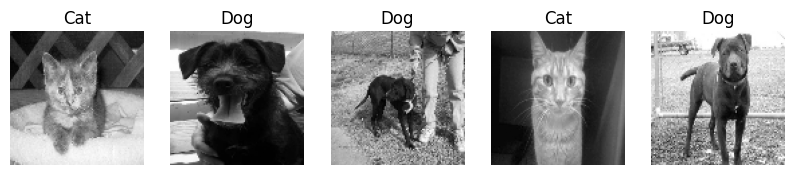

In [30]:
show_image(X, Y, no_of_images=5) # Using Y_cats for correct label mapping

In [31]:
# Normalize the pixel values of X
X_normalized = X / 255.0

print("Original X data type:", X.dtype)
print("Normalized X data type:", X_normalized.dtype)
print("Original X min/max:", X.min(), X.max())
print("Normalized X min/max:", X_normalized.min(), X_normalized.max())

# Display the first few pixels of the first normalized image as an example
print("First 10 pixels of the first normalized image:", X_normalized[0,:10])

Original X data type: uint8
Normalized X data type: float64
Original X min/max: 0 255
Normalized X min/max: 0.0 1.0
First 10 pixels of the first normalized image: [0.2        0.14901961 0.06666667 0.05882353 0.05882353 0.05490196
 0.05098039 0.06666667 0.06666667 0.05882353]


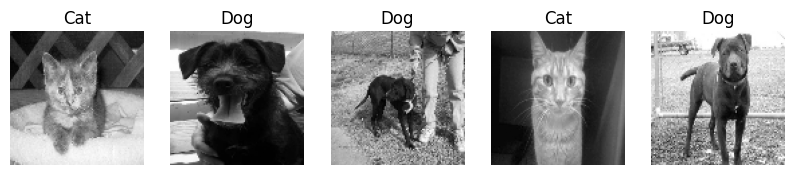

In [32]:
show_image(X_normalized, Y, no_of_images=5)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)

In [35]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(16000, 10000) (4000, 10000) (16000,) (4000,)


In [36]:
model=RandomForestClassifier()

In [37]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [38]:
train_data_prediction=model.predict(X_train)
train_accuracy_score=accuracy_score(Y_train, train_data_prediction)
print("Accuracy score: ", train_accuracy_score)

Accuracy score:  1.0


Accuracy score:  0.6285

--- Example Predictions ---


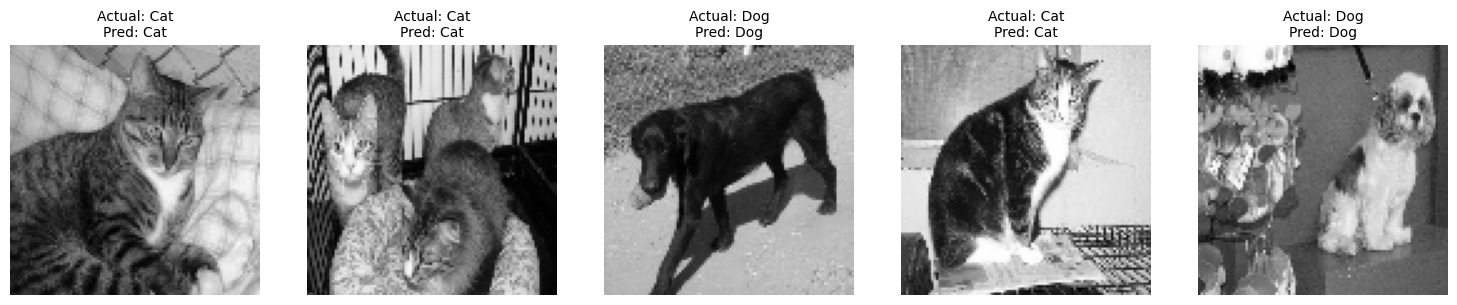

In [40]:
test_data_prediction=model.predict(X_test)
test_accuracy_score=accuracy_score(Y_test, test_data_prediction)
print("Accuracy score: ", test_accuracy_score)

import matplotlib.pyplot as plt
import numpy as np

def display_predictions(X_data, Y_actual, Y_predicted, num_examples=5):
    plt.figure(figsize=(15, 3))
    indices = np.random.choice(len(X_data), num_examples, replace=False)

    for i, idx in enumerate(indices):
        img = X_data[idx].reshape(100, 100)
        actual_label = 'Dog' if Y_actual[idx] == 1 else 'Cat'
        predicted_label = 'Dog' if Y_predicted[idx] == 1 else 'Cat'

        plt.subplot(1, num_examples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Actual: {actual_label}\nPred: {predicted_label}", fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("\n--- Example Predictions ---")
display_predictions(X_test, Y_test, test_data_prediction, num_examples=5)